In [4]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

In [5]:
# Load the MNIST dataset
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Preprocess the data
train_images = train_images / 255.0 
test_images = test_images / 255.0 

In [6]:
# Build the model
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(10, activation='softmax') 
])

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [7]:
# Compile the model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [12]:
# Train the model
history = model.fit(
    train_images, train_labels,
    epochs=5,
    validation_split=0.2,
    batch_size=64
)

Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9750 - loss: 0.0834 - val_accuracy: 0.9710 - val_loss: 0.0925
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 982us/step - accuracy: 0.9786 - loss: 0.0706 - val_accuracy: 0.9736 - val_loss: 0.0851
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 996us/step - accuracy: 0.9803 - loss: 0.0637 - val_accuracy: 0.9741 - val_loss: 0.0866
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 992us/step - accuracy: 0.9823 - loss: 0.0576 - val_accuracy: 0.9751 - val_loss: 0.0828
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 986us/step - accuracy: 0.9853 - loss: 0.0480 - val_accuracy: 0.9766 - val_loss: 0.0808
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9856 - loss: 0.0454 - val_accuracy: 0.9763 - val_loss: 0.0801
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 986us/step - accuracy: 0.9863 - loss: 0.0422 - val_accuracy: 0.9762 - val_loss: 0.0836
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 981us/step - accuracy: 0.9878 - loss: 0.0372 - val_

In [13]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 321us/step - accuracy: 0.9761 - loss: 0.0850
Test accuracy: 0.9798


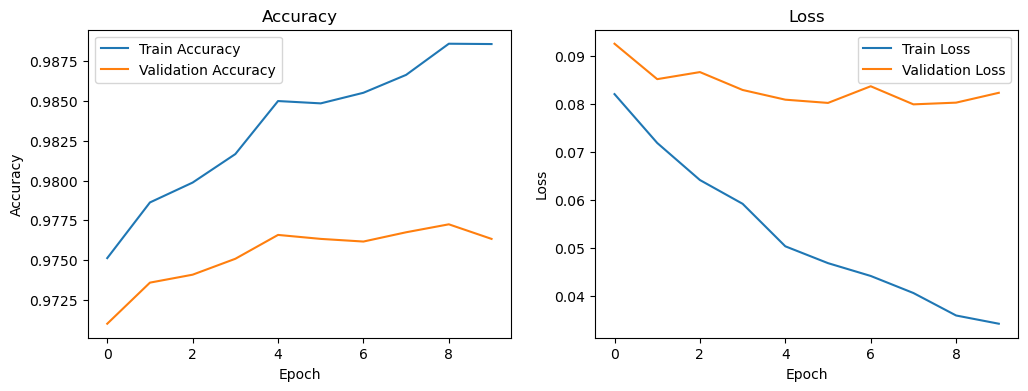

In [14]:

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss')

plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 311us/step


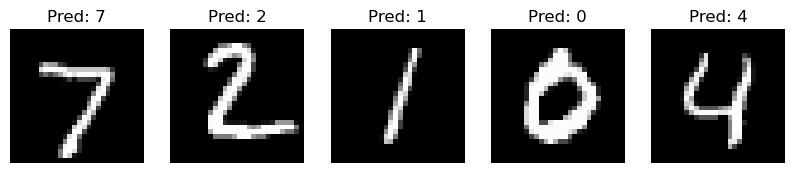

In [15]:
# Make predictions on the test dataset
predictions = model.predict(test_images)

# Display a few test images along with their predicted labels
def display_predictions(images, labels, predictions, num=5):
    plt.figure(figsize=(10, 2))
    for i in range(num):
        plt.subplot(1, num, i + 1)
        plt.imshow(images[i], cmap=plt.cm.gray)
        plt.title(f'Pred: {predictions[i].argmax()}')
        plt.axis('off')
    plt.show()

# Display predictions for the first 5 images in the test set
display_predictions(test_images, test_labels, predictions, num=5)

In [16]:
# Save the model
model.save('mnist_digit_recognition_model.h5')
print("Model saved to mnist_digit_recognition_model.h5")

Model saved to mnist_digit_recognition_model.h5


In [17]:
# Load the model
loaded_model = tf.keras.models.load_model('mnist_digit_recognition_model.h5')
print("Model loaded from mnist_digit_recognition_model.h5")

Model loaded from mnist_digit_recognition_model.h5


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step


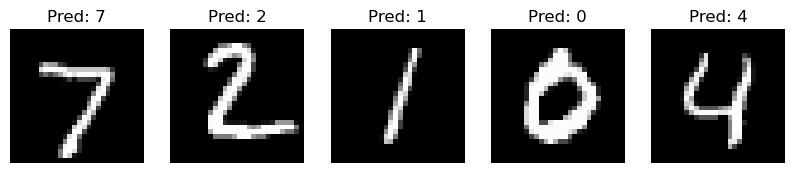

In [18]:
# Make predictions with the loaded model
predictions = loaded_model.predict(test_images)

# Display a few test images along with their predicted labels
display_predictions(test_images, test_labels, predictions, num=5)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


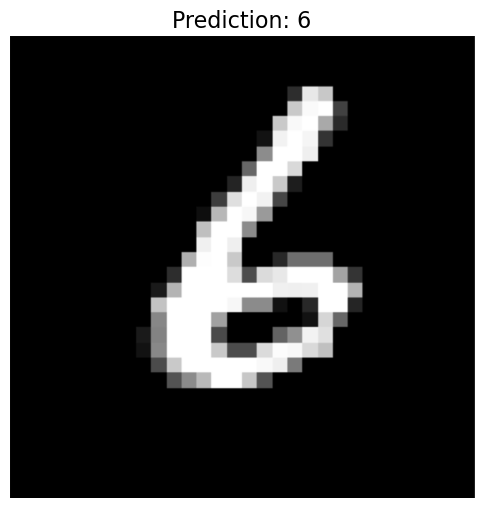

In [25]:
import tensorflow as tf
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Load and preprocess your own image
def preprocess_image(image_path):
    image = Image.open(image_path).convert('L')  # Convert to grayscale
    image = image.resize((28, 28))  # Resize to 28x28
    image_array = np.array(image)  # Convert to NumPy array
    image_array = image_array / 255.0  # Normalize
    image_array = image_array.reshape(1, 28, 28)  # Reshape
    return image_array

# Path to your input image
input_image_path = 'test.png'

# Load the saved model
loaded_model = tf.keras.models.load_model('mnist_digit_recognition_model.h5')

# Preprocess the input image
preprocessed_image = preprocess_image(input_image_path)

# Make a prediction
prediction = loaded_model.predict(preprocessed_image)

# Get the predicted class
predicted_class = prediction.argmax()

# Display the image and prediction
def display_image_with_prediction(image_path, predicted_class):
    # Load the image for displaying
    image = Image.open(image_path)
    
    # Create a plot
    plt.figure(figsize=(6, 6))
    
    # Display the image
    plt.imshow(image, cmap='gray')
    
    # Set title with prediction
    plt.title(f'Prediction: {predicted_class}', fontsize=16)
    
    # Hide axes
    plt.axis('off')
    
    # Show the plot
    plt.show()

# Call the function to display the image and prediction
display_image_with_prediction(input_image_path, predicted_class)